In [2]:
import numpy as np
import pymc3 as pm
from scipy.stats import dirichlet, norm, poisson
import theano.tensor as tt
from theano.tensor import _shared
import random 
import matplotlib.pyplot as plt
random.seed(123)
%matplotlib inline 

# 1. LDA (simulation)

In [3]:
n_topics = 2
n_vocab = 3
n_docs = 2
length_docs = np.array(n_docs*[100])
print(length_docs)

alpha = np.ones([n_docs, n_topics])
beta = np.ones([n_topics, n_vocab])
print(alpha.shape)
print(beta.shape)

theta = dirichlet(np.ones([n_topics])).rvs(n_docs)
print(theta)

phi_0 = dirichlet(np.ones([n_vocab])).rvs(n_topics)
print(phi_0)
phi = _shared(phi_0)
print(phi)

with pm.Model() as model:
    zs = [pm.Categorical("z_d{}".format(d), p=theta[d], shape=length_docs[d]) for d in range(n_docs)]    
    ws = [pm.Categorical("w_{}_{}".format(d,i), p=tt.stack(phi[zs[d][i]])) for d in range(n_docs) for i in range(length_docs[d])]
    trace = pm.sample(1000)
    

[100 100]
(2, 2)
(2, 3)
[[ 0.28873768  0.71126232]
 [ 0.29903204  0.70096796]]
[[ 0.31285264  0.28869422  0.39845314]
 [ 0.38071345  0.07617674  0.54310982]]
<TensorType(float64, matrix)>


/Users/dan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.
/Users/dan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [z_d0, z_d1]
>CategoricalGibbsMetropolis: [w_1_99, w_1_98, w_1_97, w_1_96, w_1_95, w_1_94, w_1_93, w_1_92, w_1_91, w_1_90, w_1_89, w_1_88, w_1_87, w_1_86, w_1_85, w_1_84, w_1_83, w_1_82, w_1_81, w_1_80, w_1_79, w_1_78, w_1_77, w_1_76, w_1_75, w_1_74, w_1_73, w_1_72, w_1_71, w_1_70, w_1_69, w_1_68, w_1_67, w_1_66, w_1_65, w_1_64, w_1_63, w_1_62, w_1_61, w_1_60, w_1_59, w_1_58, w_1_57, w_1_56, w_1_55, w_1_54, w_1_53, w_1_52, w_1_51, w_1_50, w_1_49, w_1_48, w_1_47, w_1_46, w_1_45, w_1_44, w_1_43, w_1_42, w_1_41, w_1_40, w_1_39, w_1_38, w_1_37, w_1_36, w_1_35, w_1_34, w_1_3

In [4]:
#pm.traceplot(trace[1500:])

In [5]:
for d in range(n_docs):
    value_z=trace.get_values("z_d{}".format(d), chains = 1)
    print(value_z.shape)
    print(value_z)

(1000, 100)
[[0 0 0 ..., 1 1 1]
 [1 1 1 ..., 1 0 1]
 [0 0 0 ..., 1 0 0]
 ..., 
 [0 1 1 ..., 1 0 1]
 [1 1 1 ..., 1 1 1]
 [0 1 1 ..., 1 1 1]]
(1000, 100)
[[1 0 1 ..., 1 1 0]
 [1 1 0 ..., 1 1 1]
 [1 1 1 ..., 1 1 0]
 ..., 
 [1 0 1 ..., 0 1 0]
 [0 1 1 ..., 1 0 1]
 [1 0 1 ..., 0 1 0]]


In [6]:
print(trace.get_values('w_0_0',chains = 1).shape)

docs = []
for d in range(n_docs):
    list_w = []
    for i in range(length_docs[d]):
        value_w = trace.get_values("w_{}_{}".format(d,i), chains = 1)
        #print(value_w.shape)
        list_w.append(list(value_w)[999])
    print(list_w)
    docs.append(list_w)
        

(1000,)
[1, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2]
[2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 1]


In [7]:
print(len(list_w))
#docs = np.transpose(list_w)
print(len(docs))

100
2


In [8]:
print(docs)

[[1, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2], [2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 1]]


# 2. LDA learning(Prepare the observed data)

In [9]:
def get_word_dict(collection):
    vocab_list = list({word for doc in collection for word in doc})
    idx_list = [i for i in range(len(vocab_list))]
    return dict(zip(vocab_list,idx_list))

def word_to_idx(dict_vocab_idx, collection):
    return [[dict_vocab_idx[word] for word in doc] for doc in collection]

dict_vocab_idx = get_word_dict(docs)
idxed_collection = word_to_idx(dict_vocab_idx, docs)
print(idxed_collection)

n_topics = 2
n_vocab = len(dict_vocab_idx)
n_docs = len(idxed_collection)
length_docs = [len(doc) for doc in idxed_collection]
print(n_topics, n_vocab, n_docs, length_docs)


[[1, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2], [2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 1]]
2 3 2 [100, 100]


# 3. LDA learning(with observed data) Hyper-parameter $\alpha, \beta \sim N(1,1)$ 

In [10]:
alpha_0 = np.ones([n_docs, n_topics])
beta_0 = np.ones([n_topics, n_vocab])

with pm.Model() as model_1:
    alpha = pm.Normal('alpha', mu = alpha_0, sd = alpha_0, shape=(n_docs, n_topics))
    beta = pm.Normal('beta', mu = beta_0, sd = beta_0, shape=(n_topics, n_vocab))
    
    theta = pm.distributions.Dirichlet('theta', a=alpha, shape=(n_docs, n_topics))
    phi = pm.distributions.Dirichlet('phi', a=beta, shape=(n_topics, n_vocab))
    
    zs = [pm.Categorical("z_d{}".format(d), p=theta[d], shape=length_docs[d]) for d in range(n_docs)]
    ws = [pm.Categorical("w_{}_{}".format(d,i), p=phi[zs[d][i]], observed=idxed_collection[d][i]) 
    for d in range(n_docs) for i in range(length_docs[d])]
    
    trace_1 = pm.sample(2000)


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [phi_stickbreaking__, theta_stickbreaking__, beta, alpha]
>BinaryGibbsMetropolis: [z_d0, z_d1]
 96%|█████████▌| 2395/2500 [12:01<00:31,  3.32it/s]/Users/dan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
100%|█████████▉| 2491/2500 [12:27<00:02,  3.33it/s]/Users/dan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
100%|██████████| 2500/2500 [12:30<00:00,  3.33it/s]/Users/dan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

/Users/dan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
Tuning was enabled throughout the whole trace.
Tuning was enabled throughout the whole trace.
Tuning was enabled throughout the whol

In [11]:
pm.summary(trace_1[1500:])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha__0_0,1.425459,0.781171,0.035120,7.504424e-02,2.865456,136.0,1.022534
alpha__0_1,1.342589,0.735801,0.033369,8.967386e-02,2.715271,94.0,1.030612
alpha__1_0,1.429285,0.748570,0.031376,1.576729e-01,2.859296,374.0,1.014598
alpha__1_1,1.249501,0.728951,0.036736,6.483328e-02,2.599973,66.0,1.024546
beta__0_0,1.471935,0.743721,0.029189,1.180602e-01,2.833471,381.0,1.008996
beta__0_1,1.118204,0.660458,0.032787,6.305552e-02,2.385783,202.0,1.003261
beta__0_2,1.601825,0.732953,0.031914,2.711172e-01,2.994694,140.0,1.004374
beta__1_0,1.377777,0.773638,0.034739,5.791198e-02,2.773329,161.0,1.008551
beta__1_1,1.269802,0.740756,0.037709,3.027722e-02,2.633747,262.0,1.001775
beta__1_2,1.553023,0.770805,0.031884,1.198714e-01,2.987256,524.0,1.001242


# 4. Try normal hyper-parameters. $\alpha, \beta \sim N(10,1)$

In [15]:
alpha_0 = np.ones([n_docs, n_topics])
beta_0 = np.ones([n_topics, n_vocab])

with pm.Model() as model_2:
    alpha = pm.Normal('alpha', mu = 10*alpha_0, sd = alpha_0, shape=(n_docs, n_topics))
    beta = pm.Normal('beta', mu = 10*beta_0, sd = beta_0, shape=(n_topics, n_vocab))
    
    theta = pm.distributions.Dirichlet('theta', a=alpha, shape=(n_docs, n_topics))
    phi = pm.distributions.Dirichlet('phi', a=beta, shape=(n_topics, n_vocab))
    
    zs = [pm.Categorical("z_d{}".format(d), p=theta[d], shape=length_docs[d]) for d in range(n_docs)]
    ws = [pm.Categorical("w_{}_{}".format(d,i), p=phi[zs[d][i]], observed=idxed_collection[d][i]) 
    for d in range(n_docs) for i in range(length_docs[d])]
    
    trace_2 = pm.sample(2000)


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [phi_stickbreaking__, theta_stickbreaking__, beta, alpha]
>BinaryGibbsMetropolis: [z_d0, z_d1]
100%|██████████| 2500/2500 [09:11<00:00,  4.53it/s]/Users/dan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

/Users/dan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
Tuning was enabled throughout the whole trace.
Tuning was enabled throughout the whole trace.
Tuning was enabled throughout the whole trace.
Tuning was enabled throughout the whole trace.
The number of effective samples is smaller tha

In [16]:
#pm.traceplot(trace)

In [17]:
pm.summary(trace_2[1500:])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha__0_0,9.970820,0.967006,0.020326,8.017357,11.795160,2000.0,0.999359
alpha__0_1,10.022785,1.016954,0.020745,8.029380,11.909032,2000.0,0.999243
alpha__1_0,9.947742,1.027529,0.022313,7.999304,11.907909,2000.0,0.999915
alpha__1_1,10.034047,1.010343,0.020676,8.194003,12.147930,2000.0,1.000157
beta__0_0,10.054392,0.982845,0.022266,8.173316,11.969833,2000.0,0.999957
beta__0_1,9.538733,0.992425,0.020145,7.577597,11.379981,1925.0,0.999635
beta__0_2,10.273115,1.040070,0.020216,8.273134,12.319600,2000.0,0.999847
beta__1_0,10.063079,0.980431,0.019218,8.235725,12.086966,2000.0,0.999164
beta__1_1,9.523896,0.986717,0.022921,7.594599,11.433107,2000.0,0.999452
beta__1_2,10.230267,0.978345,0.021145,8.317826,12.109527,2000.0,1.000150


# 5. Try beta hyper-parameters. $\alpha, \beta \sim \beta(2,5)$

In [35]:
a_0 = 2*np.ones([n_docs, n_topics])
b_0 = 5*np.ones([n_docs, n_topics])

a_1 = 2*np.ones([n_topics, n_vocab])
b_1 = 5*np.ones([n_topics, n_vocab])


with pm.Model() as model:
    p_alpha = pm.Beta('p_alpha', alpha=a_0, beta=b_0, shape=(n_docs, n_topics))
    p_beta = pm.Beta('p_beta', alpha=a_1, beta=b_1, shape=(n_topics, n_vocab))
    
    theta = pm.distributions.Dirichlet('theta', a=p_alpha, shape=(n_docs, n_topics))
    phi = pm.distributions.Dirichlet('phi', a=p_beta, shape=(n_topics, n_vocab))
    
    zs = [pm.Categorical("z_d{}".format(d), p=theta[d], shape=length_docs[d]) for d in range(n_docs)]
    ws = [pm.Categorical("w_{}_{}".format(d,i), p=phi[zs[d][i]], observed=idxed_collection[d][i]) 
    for d in range(n_docs) for i in range(length_docs[d])]
    
    trace = pm.sample(10)


INFO (theano.gof.compilelock): Refreshing lock /Users/dan/.theano/compiledir_Darwin-14.5.0-x86_64-i386-64bit-i386-3.6.4-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /Users/dan/.theano/compiledir_Darwin-14.5.0-x86_64-i386-64bit-i386-3.6.4-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [phi_stickbreaking__, theta_stickbreaking__, p_beta_logodds__, p_alpha_logodds__]
>BinaryGibbsMetropolis: [z_d0, z_d1]
 98%|█████████▊| 502/510 [02:50<00:02,  2.94it/s]/Users/dan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
100%|██████████| 510/510 [02:54<00:00,  2.92it/s]/Users/dan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

/Users/dan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dan/anaconda3/lib/pyt

In [40]:
#pm.traceplot(trace)

In [41]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
z_d0__0,0.500000,0.500000,0.141421,0.000000e+00,1.000000,2.0,inf
z_d0__1,0.450000,0.497494,0.136015,0.000000e+00,1.000000,2.0,2.669270
z_d0__2,0.525000,0.499375,0.119635,0.000000e+00,1.000000,3.0,1.713224
z_d0__3,0.575000,0.494343,0.117527,0.000000e+00,1.000000,3.0,1.804036
z_d0__4,0.575000,0.494343,0.117527,0.000000e+00,1.000000,3.0,1.804036
z_d0__5,0.425000,0.494343,0.122729,0.000000e+00,1.000000,2.0,2.299068
z_d0__6,0.575000,0.494343,0.117527,0.000000e+00,1.000000,3.0,1.804036
z_d0__7,0.525000,0.499375,0.114291,0.000000e+00,1.000000,3.0,1.664101
z_d0__8,0.550000,0.497494,0.110680,0.000000e+00,1.000000,4.0,1.510830
z_d0__9,0.525000,0.499375,0.102774,0.000000e+00,1.000000,3.0,1.536229


In [42]:
trace.get_values('p_alpha',chains = 1)[0]

array([[ 0.27612937,  0.22218109],
       [ 0.48082534,  0.24028387]])

In [43]:
trace.get_values('p_beta',chains = 1)[0]

array([[ 0.16140977,  0.0975899 ,  0.41570095],
       [ 0.45932287,  0.27122295,  0.13338463]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c3b8b2fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c47328ac8>]], dtype=object)

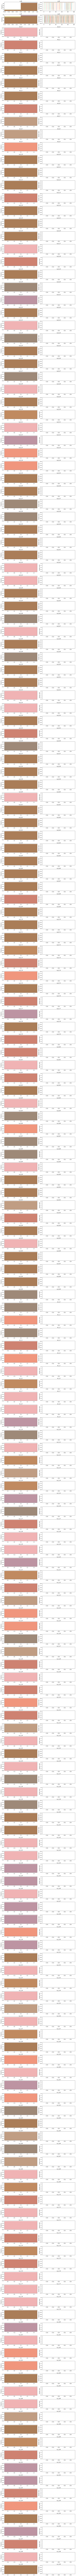

In [54]:
pm.traceplot(trace)